In [1]:
import matplotlib as plt
from numba import njit
import numpy as np
import py3Dmol

def read_data_from_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            value = float(line.strip())
            data.append(value)
    return data


In [6]:
data_array=[]
data_array = read_data_from_file("./inputfile.txt")
n=data_array[0]
N = n**3 #całkowita liczba atomów
a=data_array[3]

b_0 = np.array([a,0,0])
b_1= np.array([a/2,a*np.sqrt(3)/2,0])
b_2= np.array([a/2,a*np.sqrt(3)/6,a*np.sqrt(2/3)])

r =[]
for i1 in range(int(n)):
    for i2 in range(int(n)):
        for i3 in range(int(n)):
             r.append((i1- (n-1)/2)*b_0 + (i2 - (n-1)/2)*b_1 + (i3 - (n-1)/2)*b_2)
string_z_przerwami=[]
for i in r:
    string_z_przerwami.append(''.join(str(i)))
string_z_nowymi_liniami = '\n'.join(string_z_przerwami)
const = 1

In [45]:
import random
random_number = random.random()
E_kin_x = []
E_kin_y = []
E_kin_z = []
for i in range(int(N)):
    random_number_x = random.random()
    random_number_y = random.random()
    random_number_z = random.random()
    E_kin_x.append(-const*np.log(random_number_x))
    E_kin_y.append(-const*np.log(random_number_y))
    E_kin_z.append(-const*np.log(random_number_z))
m = data_array[1]
P=0
p_x=[]
p_y=[]
p_z=[]

for i in range(int(N)):
    a=random.choice([-1, 1])*np.sqrt(2*m*E_kin_x[i])
    b=random.choice([-1, 1])*np.sqrt(2*m*E_kin_y[i])
    c=random.choice([-1, 1])*np.sqrt(2*m*E_kin_z[i])
    p=np.array([a,b,c])
    p_x.append(a)
    p_y.append(b)
    p_z.append(c)
    P+=p   
P_divide=P/N
for i in range(int(N)):
    p_prim=p-P_divide

In [46]:
viewer = py3Dmol.view(width=300, height=300)

xyz_data ="27 \nargon\n"+string_z_nowymi_liniami
viewer.addModel(xyz_data, format='xyz')
viewer.setStyle({'stick': {}})
viewer.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Text(0.5, 1.0, 'Histogram pędów')

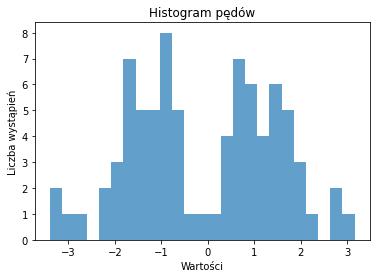

In [47]:
import matplotlib.pyplot as plt

plt.hist(p_x+p_y+p_z, bins=25, alpha=0.7)
plt.xlabel('Wartości')
plt.ylabel('Liczba wystąpień')
plt.title('Histogram pędów')